In [1]:
from pyiron import Project, ase_to_pyiron
import matplotlib.pyplot as plt
import numpy as np
from pyiron import Project
from ase.io import read, write
from pyiron import ase_to_pyiron
import ase
import os
import time

In [3]:
pr = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/new_ordered_glass/big") 

In [5]:
#for k in range(1,2,1):
#    job= pr['Boilet_623k_lis_amo_s_1_1_big_data_4_k_ps_damp_2']
#    job.transfer_from_remote()
#    job.compress()

In [6]:
job_4 = pr['Boilet_623k_lis_amo_s_1_1_big_data_4_k_ps_damp_1_5']
job_3 = pr['Boilet_623k_lis_amo_s_1_1_big_data_4_k_ps_damp_2']
job_2 = pr['Boilet_623k_lis_amo_s_1_1_big_data_4_k_ps']
job_1 = pr['Boilet_623k_lis_amo_s_1_1_big_data_4_k_ps_damp_0_5']

In [17]:
tem_1 = job_1.output.temperature
tem_2 = job_2.output.temperature
tem_3 = job_3.output.temperature
tem_4 = job_4.output.temperature

In [19]:
len(tem_1[9659-100:]) 

100

In [39]:
# Avg. temp 
print(np.average(tem_1[9659-100:9659-50]),np.average(tem_2[9659-100:9659-50]),np.average(tem_3[9659-100:9659-50]),np.average(tem_4[9659-100:9659-50]))


300.2862556683327 300.6905620310437 300.12075134998224 299.26901050061906


In [42]:
# standard deviation 
print(np.std(tem_1[9659-100:9659-50]),np.std(tem_2[9659-100:9659-50]),np.std(tem_3[9659-100:9659-50]),np.std(tem_4[9659-100:9659-50]))

2.369594472233389 2.888486215043293 2.293632164716311 2.7670869522516113


In [45]:
# Standard erorr 
print(np.std(tem_1[9659-100:9659-50],ddof=1)/np.sqrt(np.size(tem_1)),np.std(tem_2[9659-100:9659-50],ddof=1)/np.sqrt(np.size(tem_2)),np.std(tem_3[9659-100:9659-50],ddof=1)/np.sqrt(np.size(tem_3)),np.std(tem_4[9659-100:9659-50],ddof=1)/np.sqrt(np.size(tem_4)))

0.02435537984443647 0.029688699803764977 0.023574617197022543 0.028440922940351214


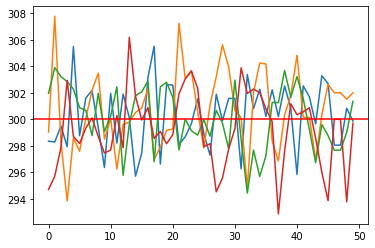

In [46]:
plt.plot(tem_1[9659-100:9659-50])
plt.plot(tem_2[9659-100:9659-50])
plt.plot(tem_3[9659-100:9659-50])
plt.plot(tem_4[9659-100:9659-50])
plt.axhline(y=300, color='red')

In [24]:
job['output/generic']

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'positions', 'pressures', 'steps', 'temperature', 'unwrapped_positions', 'velocities', 'volume']}

In [9]:
# Basic calculations 
O = 15.999400*12 #*648 #(O)
Na = 22.989769*3 #*162 #(Na)
Zr = 91.223999*2 #*108 #(Zr)
Si = 28.085501*2 #*108 #(Si)
P = 30.973763 #*54 #(P)
mol_mass = (O+Na+Zr+Si+P) # (g/mol)
no_atoms = 20   # Each NASICON contains at x=3 
total_nasicon = 1080/20  # 54 
avo_no = 6.022*10**(23)
mas_mol = mol_mass/avo_no  # (g/molecule)

def density(volume):
    density = total_nasicon*mas_mol/(volume*1e-24) # g/cm3
    sp_volume = 1/density  # cm3/g
    return density, sp_volume   

# Calculate quech rate and time 
rate = range(1,11,1)
m_keep = []     # steps to evalute Tg (Cook and quench)
for i in rate:
    time = (3000/i)*1000
    m_keep.append(round(time)/100)
intial_skip = 2600  # Heating and equilibration
next_skip = 200+5+5 # NPT+NVT+NVE

In [26]:
ran = range(2,11,1)
ran_1 = range(1,2,1)

In [27]:
den = []
tm = []
vol = []
den_1 = []
tm_1 = []
en = []
en_1 = []
vol_1 = []

#for i in ran_1:
job = pr['Boilet_623k_lis_amo_s_1_1_big_data_4_k_ps_damp_1_5']   
den_1.append((total_nasicon*mas_mol)/(job['output/generic/volume'][2700:]*1e-24))   #g/cm3
vol_1.append((job['output/generic/volume'][2700:]*1e-24))   #cm3
tm_1.append(job['output/generic/temperature'][2700:])
en_1.append(job['output/generic/energy_pot'][2700:])
#for k in ran:
    #print(k)
job = pr['Boilet_623k_lis_amo_s_1_1_big_data_4_k_ps_damp_1_5']   
den.append((total_nasicon*mas_mol)/(job['output/generic/volume'][2700:]*1e-24))   #g/cm3
vol.append((job['output/generic/volume'][2700:]*1e-24))
tm.append(job['output/generic/temperature'][2700:])
en.append(job['output/generic/energy_pot'][2700:])

TypeError: unsupported operand type(s) for /: 'int' and 'list'

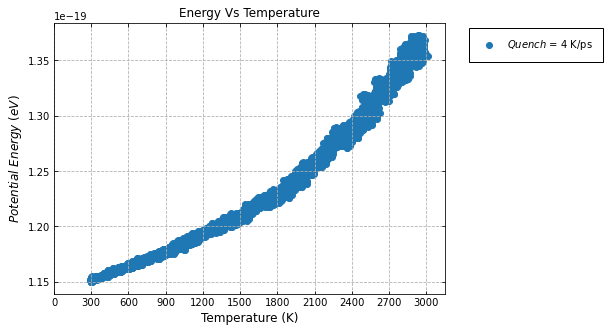

In [28]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
#plt.xlim([300, 2800])
#plt.ylim([0.1, 0.250])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.scatter(tm,vol, label='$Quench$ = 4 K/ps')
plt.grid(which='both')
plt.grid(True, linestyle='--')
plt.xticks(np.arange(0,3300,300))
plt.title("Energy Vs Temperature")
plt.xlabel(r"Temperature (K)", fontsize=12)
plt.ylabel("$Potential $ $Energy$ $(eV)$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black", bbox_to_anchor=(1.05,1.0))
#plt.savefig("pot_energy_vs_temp_ordered_1.png", bbox_inches='tight', dpi=600, transparent=False)